# IMPORTS AND DOWNLOADS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# descriptive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import io
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import seaborn as sns
from scipy.stats import pearsonr
import re
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
# sentiment
!pip install -q transformers
!pip install torch

In [11]:
import pandas as pd
import numpy as np
import json
from transformers import pipeline
import torch

In [12]:
import os
import sys
from pathlib import Path

#PATH = '/content/drive/MyDrive/habrok'
ROOT_FOLDER = Path('/content/drive/MyDrive/habrok')

In [13]:
ROOT_FOLDER

PosixPath('/content/drive/MyDrive/habrok')

# LOAD DATA

In [14]:
with open(ROOT_FOLDER / 'dataset/dataset_en_train.json', 'r', encoding='utf-8') as f:
    dataset_train=json.load(f)

In [15]:
len(dataset_train)

4000

In [16]:
df_train = pd.DataFrame(dataset_train)
df_train.head()

,id,text,category,annotations,spacy_tokens
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...


In [17]:
with open(ROOT_FOLDER / 'dataset/dataset_en_test.json', 'r', encoding='utf-8') as f:
    dataset_test=json.load(f)

In [18]:
len(dataset_test)

1000

In [19]:
df_test = pd.DataFrame(dataset_test)
df_test.head()

,id,text,category,annotations,spacy_tokens
0,6742,Elon now confirming what we 've been suspectin...,CONSPIRACY,"[{'span_text': 'Elon', 'category': 'CAMPAIGNER...",WyJFbG9uIiwgIm5vdyIsICJjb25maXJtaW5nIiwgIndoYX...
1,10596,KEEPING THE PRESSURE ON THE POLICE TO UPHOLD T...,CONSPIRACY,"[{'span_text': 'THE POLICE', 'category': 'FACI...",WyJLRUVQSU5HIiwgIlRIRSIsICJQUkVTU1VSRSIsICJPTi...
2,482,” SAFE & EFFECTIVE ’’ - The greatest lie ever ...,CRITICAL,[{'span_text': 'The mRNA vaccines potentially ...,WyJcdTIwMWQiLCAiU0FGRSIsICImIiwgIkVGRkVDVElWRS...
3,1613,CDC report admits 74.2 million people in the U...,CRITICAL,"[{'span_text': 'The American people', 'categor...",WyJDREMiLCAicmVwb3J0IiwgImFkbWl0cyIsICI3NC4yIi...
4,10549,How to use health to acquire Totalitarian cont...,CONSPIRACY,[{'span_text': 'to acquire Totalitarian contro...,WyJIb3ciLCAidG8iLCAidXNlIiwgImhlYWx0aCIsICJ0by...


In [20]:
df = pd.concat([df_train, df_test], keys=['train', 'test'])
df

id                                               text  \
train 0     5206  THIS IS MASSIVE Australian Senator Malcolm Rob...   
      1     1387  “ I ’m deeply concerned that the push to vacci...   
      2    13116  2021 : They wanted to know your vaccination st...   
      3    11439  Anthony Fauci once again defended brutal Chine...   
      4       98  Proof has emerged showing that death from Wuha...   
...          ...                                                ...   
test  995   1314  John D. Rockefeller Wiped Out Natural Cures To...   
      996   4153  Fact Check : Biden White House Falsely Accuses...   
      997  10197  w onset acral hand lesions following mRNA vacc...   
      998  12099  " " " WE WILL FIRE UNVACCINATED WORKERS " " ( ...   
      999  10705  THEY ARE GEARING UP FOR THE BOOSTER KILL SHOT ...   

             category                                        annotations  \
train 0    CONSPIRACY  [{'span_text': 'Australian Senator Malcolm Rob...   
      1      CRITICAL  [{'span_text': 'I ’m deeply concerned that the...   
      2      CRITICAL  [{'span_text': 'someone who died suddenly', 'c...   
      3      CRITICAL  [{'span_text': 'brutal Chinese lockdowns', 'ca...   
      4      CRITICAL  [{'span_text': 'death from Wuhan coronavirus (...   
...               ...                                                ...   
test  995  CONSPIRACY  [{'span_text': 'John D. Rockefeller', 'categor...   
      996    CRITICAL  [{'span_text': 'Biden White House', 'category'...   
      997    CRITICAL  [{'span_text': 'w onset acral hand lesions fol...   
      998    CRITICAL  [{'span_text': 'UNVACCINATED WORKERS', 'catego...   
      999  CONSPIRACY  [{'span_text': 'THE BOOSTER KILL SHOT', 'categ...   

                                                spacy_tokens  
train 0    WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...  
      1    WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...  
      2    WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...  
      3    WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...  
      4    WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...  
...                                                      ...  
test  995  WyJKb2huIiwgIkQuIiwgIlJvY2tlZmVsbGVyIiwgIldpcG...  
      996  WyJGYWN0IiwgIkNoZWNrIiwgIjoiLCAiQmlkZW4iLCAiV2...  
      997  WyJ3IiwgIm9uc2V0IiwgImFjcmFsIiwgImhhbmQiLCAibG...  
      998  WyJcIiIsICJcIiIsICJcIiIsICJXRSIsICJXSUxMIiwgIk...  
      999  WyJUSEVZIiwgIkFSRSIsICJHRUFSSU5HIiwgIlVQIiwgIk...  

[5000 rows x 5 columns]

In [21]:
# preprocessing
def preproc(text):
    text = re.sub(r'http\S+', '', text) #url removal
    text = re.sub(r'[`/:“”’]', '', text) #special character removal
    text = text.replace('``', '').replace('  ', ' ') #remove backticks and empty strings

    tokens = word_tokenize(text) #tokenization

    tokens = [word for word in tokens if word not in string.punctuation] #punctuation removal
    tokens = [word.lower() for word in tokens] #lowercase
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words] #stopwords removal
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #lemmatization

    return tokens

In [22]:
df['preprocessed_text'] = df['text'].apply(preproc)
df.head()

id                                               text    category  \
train 0   5206  THIS IS MASSIVE Australian Senator Malcolm Rob...  CONSPIRACY   
      1   1387  “ I ’m deeply concerned that the push to vacci...    CRITICAL   
      2  13116  2021 : They wanted to know your vaccination st...    CRITICAL   
      3  11439  Anthony Fauci once again defended brutal Chine...    CRITICAL   
      4     98  Proof has emerged showing that death from Wuha...    CRITICAL   

                                               annotations  \
train 0  [{'span_text': 'Australian Senator Malcolm Rob...   
      1  [{'span_text': 'I ’m deeply concerned that the...   
      2  [{'span_text': 'someone who died suddenly', 'c...   
      3  [{'span_text': 'brutal Chinese lockdowns', 'ca...   
      4  [{'span_text': 'death from Wuhan coronavirus (...   

                                              spacy_tokens  \
train 0  WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...   
      1  WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...   
      2  WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...   
      3  WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...   
      4  WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...   

                                         preprocessed_text  
train 0  [massive, australian, senator, malcolm, robert...  
      1  [deeply, concerned, push, vaccinate, child, no...  
      2  [2021, wanted, know, vaccination, status, see,...  
      3  [anthony, fauci, defended, brutal, chinese, lo...  
      4  [proof, emerged, showing, death, wuhan, corona...

# BINARY LABELS AND TEXT ANALYSIS

## Overall Analysis

In [23]:
#class distribution
df['category'].value_counts()

,count
category,
CRITICAL,3276
CONSPIRACY,1724


In [24]:
df_train['category'].value_counts()

,count
category,
CRITICAL,2621
CONSPIRACY,1379


In [25]:
df_test['category'].value_counts()

,count
category,
CRITICAL,655
CONSPIRACY,345


In [26]:
# only analyzing the training set
df = df_train
len(df)

4000

In [27]:
df['preprocessed_text'] = df['text'].apply(preproc)
df.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert..."
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no..."
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,..."
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo..."
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona..."


In [28]:
# character based length
text_lengths = df['text'].apply(len)
text_lengths

,text
0,218
1,294
2,198
3,326
4,698
...,...
3995,200
3996,502
3997,381
3998,280


In [29]:
# character based text length analysis
print("Character-based Text Length:")
print("Mean:", text_lengths.mean())
print("Median:", text_lengths.median())
print("Maximum:", text_lengths.max())

Character-based Text Length:
Mean: 568.0265
Median: 379.0
Maximum: 4695


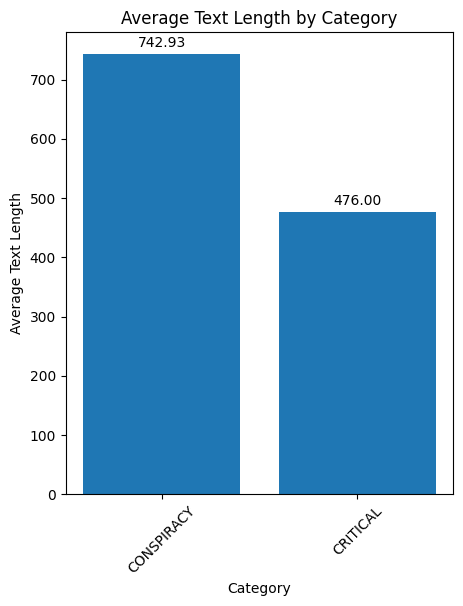

In [30]:
# average text length by category graph
# CRITICAL      2621
# CONSPIRACY    1379
# there is less texts for conspiracy but they are much longer
avg_text_length_per_category = df.groupby('category')['text'].apply(lambda x: x.str.len().mean())
fig, ax = plt.subplots(figsize=(5, 6))
bars = ax.bar(avg_text_length_per_category.index, avg_text_length_per_category.values)
ax.bar_label(bars, fmt='%.2f', padding=3)
ax.set_xlabel('Category')
ax.set_ylabel('Average Text Length')
ax.set_title('Average Text Length by Category')
plt.xticks(rotation=45)
plt.show()

In [31]:
# correlation analysis
# yes its statistically significant that the text length decreases for "critical" but it's not that strong of a relationship
# so you can't use text length for prediction
# but it's still important to keep in mind to control for data imbalance
# or should i look for ways to stabilize text length somehow to prevent skew? but that would be difficult without losing info
# maybe getting summaries of texts that are above 500 in length?
# or data augmentation for critical, rephrasing or backtranslation
# but these might make annotation tricky for seq labeling, maybe only for the binary task
df['category_numeric'] = df['category'].map({'CONSPIRACY': 0, 'CRITICAL': 1})
correlation_coefficient, p_value = pearsonr(df['text'].str.len(), df['category_numeric'])

print("Correlation coefficient between text length and category:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient between text length and category: -0.21276779726603207
p-value: 3.564184730823707e-42


## Label Analysis

In [32]:
df.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1


In [33]:
df_critical = df[df['category'] == 'CRITICAL']
df_conspiracy = df[df['category'] == 'CONSPIRACY']

In [34]:
df_critical.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1
5,4279,"Joe Biden , who told Americans last year , “ Y...",CRITICAL,"[{'span_text': 'Joe Biden', 'category': 'AGENT...",WyJKb2UiLCAiQmlkZW4iLCAiLCIsICJ3aG8iLCAidG9sZC...,"[joe, biden, told, american, last, year, going...",1


In [35]:
df_conspiracy.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0
6,11306,""" 1861 for a number of black - magick - relate...",CONSPIRACY,"[{'span_text': '[ DS ] TAPURIANS', 'category':...",WyJcIiIsICIxODYxIiwgImZvciIsICJhIiwgIm51bWJlci...,"[``, 1861, number, black, magick, related, hum...",0
10,12217,First RNA - messenger from apoptosis cells and...,CONSPIRACY,[{'span_text': 'to ARM ( WEAPONISE ) the bacte...,WyJGaXJzdCIsICJSTkEiLCAiLSIsICJtZXNzZW5nZXIiLC...,"[first, rna, messenger, apoptosis, cell, rna, ...",0
11,3321,EXIT COVID - NEXT - RUSSIA IS BAD NARRATIVE - ...,CONSPIRACY,[{'span_text': 'EXIT COVID - NEXT - RUSSIA IS ...,WyJFWElUIiwgIkNPVklEIiwgIi0iLCAiTkVYVCIsICItIi...,"[exit, covid, next, russia, bad, narrative, ms...",0
12,867,I believe that 70 to 80 % of We The People sup...,CONSPIRACY,"[{'span_text': '70 to 80 % of We The People', ...",WyJJIiwgImJlbGlldmUiLCAidGhhdCIsICI3MCIsICJ0by...,"[believe, 70, 80, people, support, president, ...",0


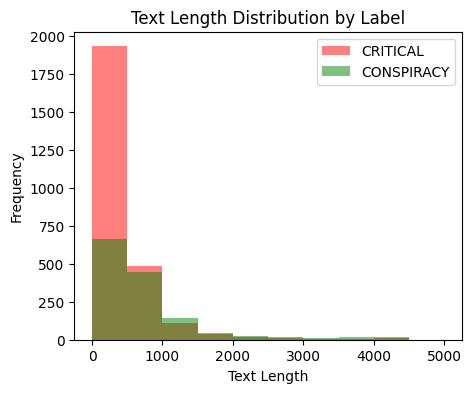

In [36]:
# character based length histogram by category
# conspiracy is more spread out in terms of length variation
# vast majority of critical texts seem clustered around 0-500 length
plt.figure(figsize=(5, 4))

plt.hist(df_critical['text'].str.len(),
         bins=range(0, max(df_critical['text'].str.len()) + 500, 500),
         color='red', alpha=0.5,
         label='CRITICAL')
plt.hist(df_conspiracy['text'].str.len(),
         bins=range(0, max(df_conspiracy['text'].str.len()) + 500, 500),
         color='green', alpha=0.5,
         label='CONSPIRACY')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution by Label')
plt.legend()
plt.show()

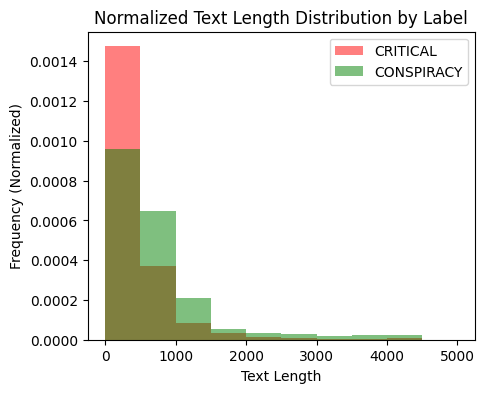

In [37]:
# normalized by text count
# still seems more spread out for conspiracy, even less balanced
plt.figure(figsize=(5, 4))

plt.hist(df_critical['text'].str.len(),
         bins=range(0, max(df_critical['text'].str.len()) + 500, 500),
         color='red', alpha=0.5,
         label='CRITICAL',
         density=True)
plt.hist(df_conspiracy['text'].str.len(),
         bins=range(0, max(df_conspiracy['text'].str.len()) + 500, 500),
         color='green', alpha=0.5,
         label='CONSPIRACY',
         density=True)

plt.xlabel('Text Length')
plt.ylabel('Frequency (Normalized)')
plt.title('Normalized Text Length Distribution by Label')
plt.legend()
plt.show()

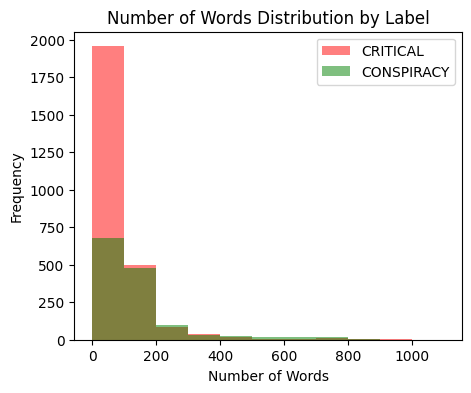

In [38]:
# length by word count, by category histogram
# assuming blank space means word
# more or less the same results as character-based length
plt.figure(figsize=(5, 4))

plt.hist(df_critical['text'].str.split().map(lambda x: len(x)),
         bins=range(0, max(df_critical['text'].str.split().map(lambda x: len(x))) + 100, 100),
         color='red', alpha=0.5,
         label='CRITICAL')
plt.hist(df_conspiracy['text'].str.split().map(lambda x: len(x)),
         bins=range(0, max(df_conspiracy['text'].str.split().map(lambda x: len(x))) + 100, 100),
         color='green', alpha=0.5,
         label='CONSPIRACY')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Number of Words Distribution by Label')
plt.legend()
plt.show()

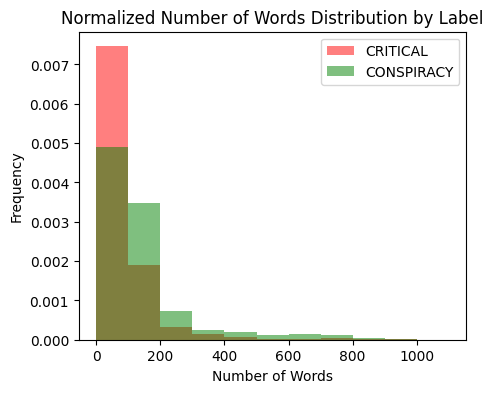

In [39]:
# normalized by text count
# same results
plt.figure(figsize=(5, 4))

plt.hist(df_critical['text'].str.split().map(lambda x: len(x)),
         bins=range(0, max(df_critical['text'].str.split().map(lambda x: len(x))) + 100, 100),
         color='red', alpha=0.5,
         label='CRITICAL',
         density=True)
plt.hist(df_conspiracy['text'].str.split().map(lambda x: len(x)),
         bins=range(0, max(df_conspiracy['text'].str.split().map(lambda x: len(x))) + 100, 100),
         color='green', alpha=0.5,
         label='CONSPIRACY',
         density=True)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Normalized Number of Words Distribution by Label')
plt.legend()
plt.show()

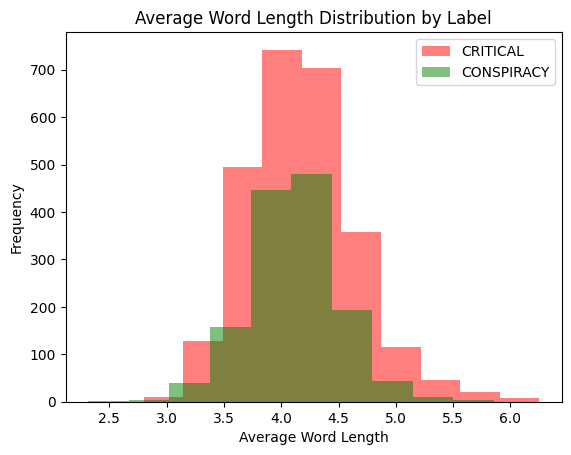

In [40]:
# average word length for texts by category
# they have the same average, critical seems a bit more likely to have longer words
# conspiracy seems more evenly distributed
plt.hist(df_critical['text'].str.split().apply(lambda x: np.mean([len(i) for i in x])),
         color='red', alpha=0.5,
         label='CRITICAL')
plt.hist(df_conspiracy['text'].str.split().apply(lambda x: np.mean([len(i) for i in x])),
         color='green', alpha=0.5,
         label='CONSPIRACY')

plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Average Word Length Distribution by Label')
plt.legend()
plt.show()

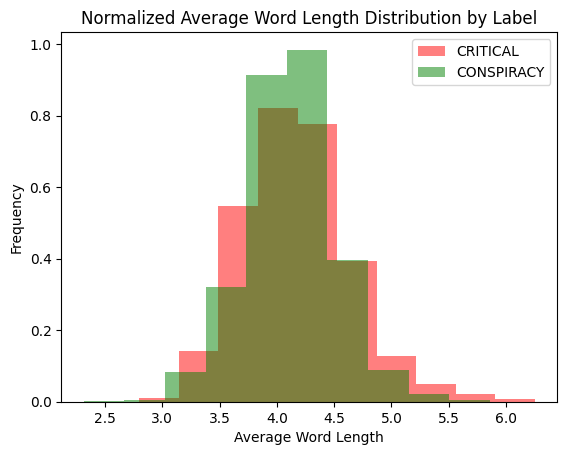

In [41]:
# normalized
# when normalized conspiracy seems more clustered around average
# with critical slightly more likely to have longer words
plt.hist(df_critical['text'].str.split().apply(lambda x: np.mean([len(i) for i in x])),
         color='red', alpha=0.5,
         label='CRITICAL',
         density=True)
plt.hist(df_conspiracy['text'].str.split().apply(lambda x: np.mean([len(i) for i in x])),
         color='green', alpha=0.5,
         label='CONSPIRACY',
         density=True)

plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Normalized Average Word Length Distribution by Label')
plt.legend()
plt.show()

In [42]:
# get how many sentences there are in each text
# assuming every text has at least 1 sentence and each sentence is ended by punctuation
# add feature--  count consecutive repetition of punctuation as 1 sentence
# this is more of an estimate as this might not be the case for internet speech
sentence_pattern = r'[.!?]+'

df_critical['sentence_count'] = 1 + df_critical['text'].str.count(sentence_pattern)
df_conspiracy['sentence_count'] = 1 + df_conspiracy['text'].str.count(sentence_pattern)

# replace null with 0 just incase
df_critical['sentence_count'].fillna(0, inplace=True)
df_conspiracy['sentence_count'].fillna(0, inplace=True)

<ipython-input-42-efffe4e9bb26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical['sentence_count'] = 1 + df_critical['text'].str.count(sentence_pattern)
<ipython-input-42-efffe4e9bb26>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conspiracy['sentence_count'] = 1 + df_conspiracy['text'].str.count(sentence_pattern)
<ipython-input-42-efffe4e9bb26>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior

In [43]:
df_critical.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,sentence_count
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,4
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,3
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,3
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,5
5,4279,"Joe Biden , who told Americans last year , “ Y...",CRITICAL,"[{'span_text': 'Joe Biden', 'category': 'AGENT...",WyJKb2UiLCAiQmlkZW4iLCAiLCIsICJ3aG8iLCAidG9sZC...,"[joe, biden, told, american, last, year, going...",1,3


In [44]:
df_critical['text'][4]

'Proof has emerged showing that death from Wuhan coronavirus ( COVID - 19 ) “ vaccine ” is not always an immediate thing . “ The bottom line is this : the ‘ death window ’ for the vaccine is n’t days or weeks ; it ’s at least a year and possibly more , ” Kirsch said . ( Related : COVID “ vaccines ” also cause AIDS ) “ So just because you got your vaccine and are still alive 3 months later , it does not mean that you ’re out of the woods . ” I would n’t say this is “ ground - breaking ” at this point , but it is reminder , that those who took jab are ticking timebombs , with each shot making it worse due to their infinite creation of spike proteins per the mRNA throughout the body . ARTICLE '

In [45]:
df_conspiracy.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,sentence_count
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,4
6,11306,""" 1861 for a number of black - magick - relate...",CONSPIRACY,"[{'span_text': '[ DS ] TAPURIANS', 'category':...",WyJcIiIsICIxODYxIiwgImZvciIsICJhIiwgIm51bWJlci...,"[``, 1861, number, black, magick, related, hum...",0,16
10,12217,First RNA - messenger from apoptosis cells and...,CONSPIRACY,[{'span_text': 'to ARM ( WEAPONISE ) the bacte...,WyJGaXJzdCIsICJSTkEiLCAiLSIsICJtZXNzZW5nZXIiLC...,"[first, rna, messenger, apoptosis, cell, rna, ...",0,10
11,3321,EXIT COVID - NEXT - RUSSIA IS BAD NARRATIVE - ...,CONSPIRACY,[{'span_text': 'EXIT COVID - NEXT - RUSSIA IS ...,WyJFWElUIiwgIkNPVklEIiwgIi0iLCAiTkVYVCIsICItIi...,"[exit, covid, next, russia, bad, narrative, ms...",0,4
12,867,I believe that 70 to 80 % of We The People sup...,CONSPIRACY,"[{'span_text': '70 to 80 % of We The People', ...",WyJJIiwgImJlbGlldmUiLCAidGhhdCIsICI3MCIsICJ0by...,"[believe, 70, 80, people, support, president, ...",0,15


In [46]:
df_conspiracy['text'][12]
# repetitive punctuation throwing it off

'I believe that 70 to 80 % of We The People support President Donald Trump . I also believe that 100 % of local , state , and federal RINO Republican “ selected ” officials and candidates do not support President Trump . They just use him but do not fight for him . Which means the RINO Republicans do not fight for We The People . They throw us bones while they stick the meat in their own pockets and the pockets of their ruling elite cronies . How can you identify the RINO Republicans ? ? ? They are the “ Republicans ” who are NOT taking ACTION to FIX 2020 and get rid of the computer voting cheat machines . They can only be “ selected , ” because even they know they are not worthy of being “ elected . ” The RINO Republicans are traitors to the We The People . But these are just my opinions . What do you think ? Lin   https :// t . me / replytolinwood '

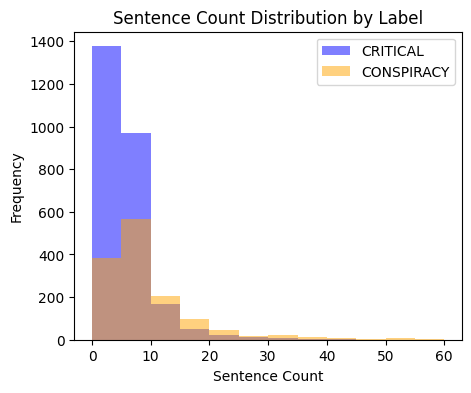

In [47]:
# histogram of sentence count by label
# again critical seems much more organized and concise, conspiracy goes up to 60 sentences
plt.figure(figsize=(5, 4))

plt.hist(df_critical['sentence_count'],
         bins=range(0, min(61, max(df_critical['sentence_count']) + 5), 5),
         color='blue', alpha=0.5,
         label='CRITICAL')
plt.hist(df_conspiracy['sentence_count'],
         bins=range(0, min(61, max(df_conspiracy['sentence_count']) + 5), 5),
         color='orange', alpha=0.5,
         label='CONSPIRACY')

plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.title('Sentence Count Distribution by Label')
plt.legend()
plt.show()

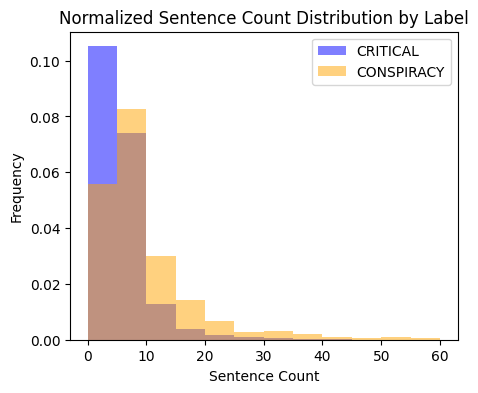

In [48]:
# normalized
plt.figure(figsize=(5, 4))

plt.hist(df_critical['sentence_count'],
         bins=range(0, min(61, max(df_critical['sentence_count']) + 5), 5),
         color='blue', alpha=0.5,
         label='CRITICAL',
         density=True)
plt.hist(df_conspiracy['sentence_count'],
         bins=range(0, min(61, max(df_conspiracy['sentence_count']) + 5), 5),
         color='orange', alpha=0.5,
         label='CONSPIRACY',
         density=True)

plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.title('Normalized Sentence Count Distribution by Label')
plt.legend()
plt.show()

In [49]:
# word count in each text
# assuming blank space = word
# also more of an estimate
df_critical['word_count'] = df_critical['text'].str.split().str.len()
df_conspiracy['word_count'] = df_conspiracy['text'].str.split().str.len()

<ipython-input-49-fcdce0e9f17c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critical['word_count'] = df_critical['text'].str.split().str.len()
<ipython-input-49-fcdce0e9f17c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conspiracy['word_count'] = df_conspiracy['text'].str.split().str.len()


In [50]:
df_critical.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,sentence_count,word_count
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,4,57
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,3,39
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,3,62
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,5,150
5,4279,"Joe Biden , who told Americans last year , “ Y...",CRITICAL,"[{'span_text': 'Joe Biden', 'category': 'AGENT...",WyJKb2UiLCAiQmlkZW4iLCAiLCIsICJ3aG8iLCAidG9sZC...,"[joe, biden, told, american, last, year, going...",1,3,58


In [51]:
df_conspiracy.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,sentence_count,word_count
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,4,39
6,11306,""" 1861 for a number of black - magick - relate...",CONSPIRACY,"[{'span_text': '[ DS ] TAPURIANS', 'category':...",WyJcIiIsICIxODYxIiwgImZvciIsICJhIiwgIm51bWJlci...,"[``, 1861, number, black, magick, related, hum...",0,16,448
10,12217,First RNA - messenger from apoptosis cells and...,CONSPIRACY,[{'span_text': 'to ARM ( WEAPONISE ) the bacte...,WyJGaXJzdCIsICJSTkEiLCAiLSIsICJtZXNzZW5nZXIiLC...,"[first, rna, messenger, apoptosis, cell, rna, ...",0,10,91
11,3321,EXIT COVID - NEXT - RUSSIA IS BAD NARRATIVE - ...,CONSPIRACY,[{'span_text': 'EXIT COVID - NEXT - RUSSIA IS ...,WyJFWElUIiwgIkNPVklEIiwgIi0iLCAiTkVYVCIsICItIi...,"[exit, covid, next, russia, bad, narrative, ms...",0,4,32
12,867,I believe that 70 to 80 % of We The People sup...,CONSPIRACY,"[{'span_text': '70 to 80 % of We The People', ...",WyJJIiwgImJlbGlldmUiLCAidGhhdCIsICI3MCIsICJ0by...,"[believe, 70, 80, people, support, president, ...",0,15,176


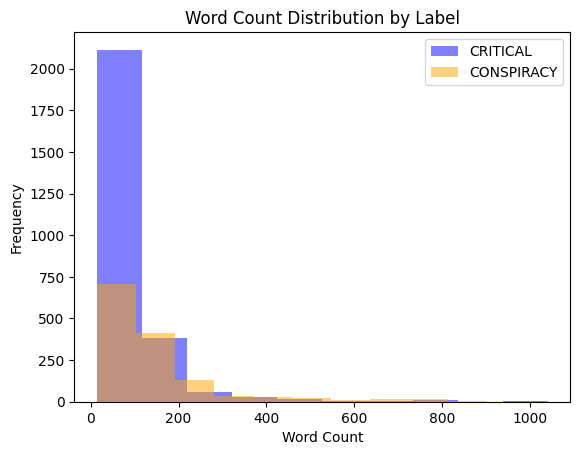

In [52]:
# word count histograms by label
plt.hist(df_critical['word_count'],
         color='blue', alpha=0.5,
         label='CRITICAL')
plt.hist(df_conspiracy['word_count'],
         color='orange', alpha=0.5,
         label='CONSPIRACY')

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution by Label')
plt.legend()
plt.show()

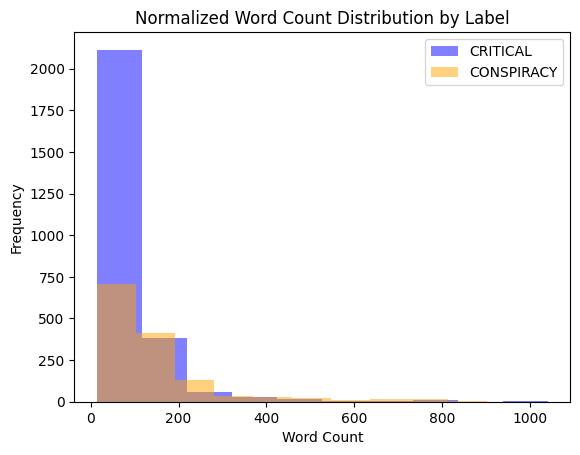

In [53]:
# normalized
plt.hist(df_critical['word_count'],
         color='blue', alpha=0.5,
         label='CRITICAL')
plt.hist(df_conspiracy['word_count'],
         color='orange', alpha=0.5,
         label='CONSPIRACY')

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Normalized Word Count Distribution by Label')
plt.legend()
plt.show()

In [54]:
#without preprocessing

In [55]:
# corpus total, corpus critical, corpus conspiracy
# without stopwords
# have to do custom stopwords for these

In [56]:
en_stopwords=set(stopwords.words('english'))

In [57]:
corpus_total = []
df_words = df['text'].str.lower().str.split().values.tolist()
corpus_total = [word for i in df_words for word in i]

counter=Counter(corpus_total)
most=counter.most_common()

<Axes: >

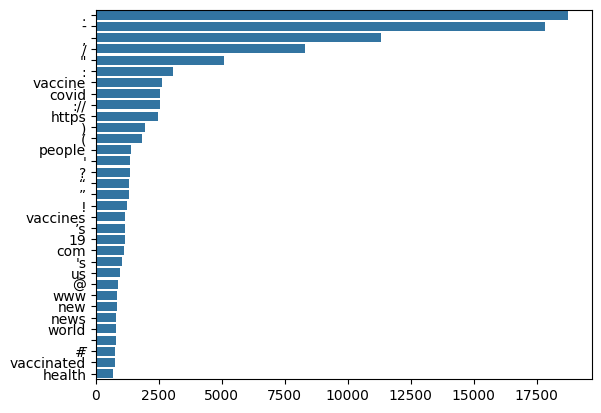

In [58]:
# top for total
x, y= [], []
for word,count in most[:80]:
    if (word not in en_stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [59]:
corpus_critical = []
df_words_critical = df_critical['text'].str.lower().str.split().values.tolist()
corpus_critical = [word for i in df_words_critical for word in i]

counter_critical=Counter(corpus_critical)
most_critical=counter_critical.most_common()

<Axes: >

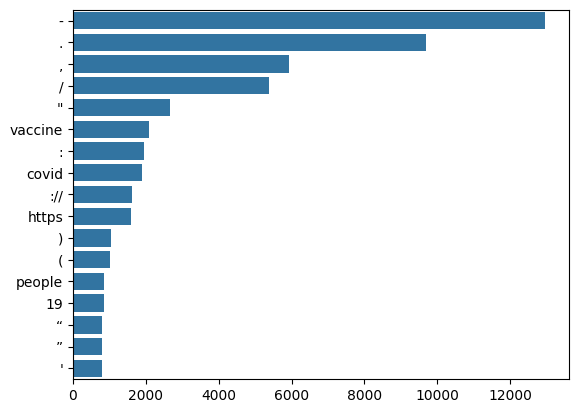

In [60]:
# top for critical label
a, b= [], []
for word,count in most_critical[:40]:
    if (word not in en_stopwords):
        a.append(word)
        b.append(count)

sns.barplot(x=b,y=a)

In [61]:
corpus_conspiracy = []
df_words_conspiracy = df_conspiracy['text'].str.lower().str.split().values.tolist()
corpus_conspiracy = [word for i in df_words_conspiracy for word in i]

counter_conspiracy=Counter(corpus_conspiracy)
most_conspiracy=counter_conspiracy.most_common()

<Axes: >

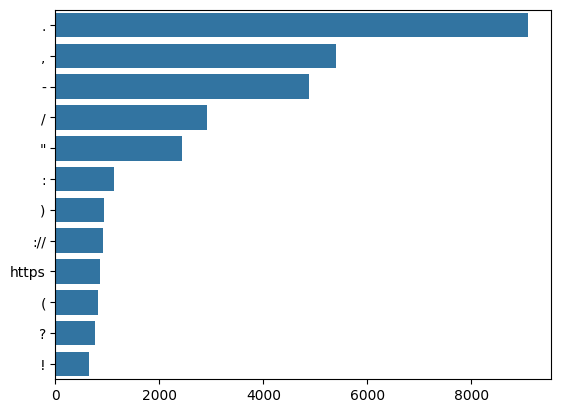

In [62]:
# top for conspiracy label
a, b= [], []
for word,count in most_conspiracy[:40]:
    if (word not in en_stopwords):
        a.append(word)
        b.append(count)

sns.barplot(x=b,y=a)

<Axes: >

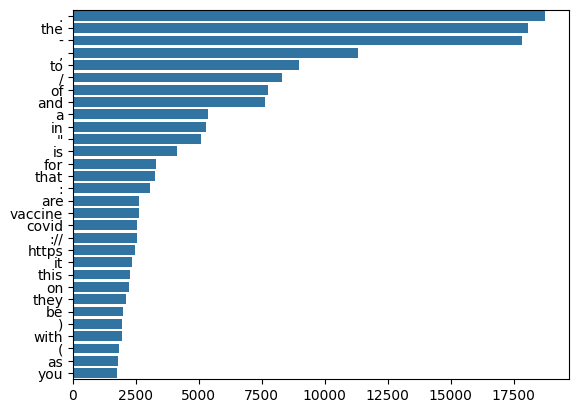

In [63]:
#with stopwords total
x, y= [], []
for word,count in most[:30]:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)

<Axes: >

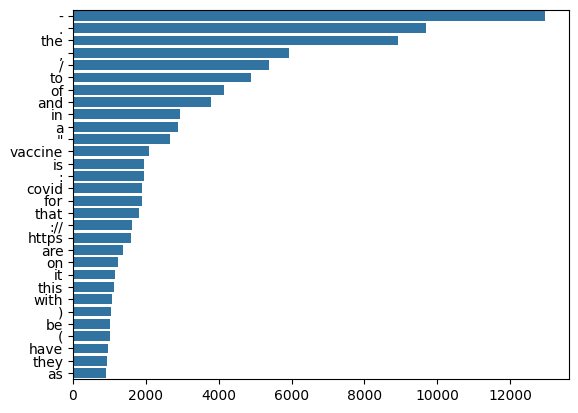

In [64]:
#with stopwords critical
x, y= [], []
for word,count in most_critical[:30]:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)

<Axes: >

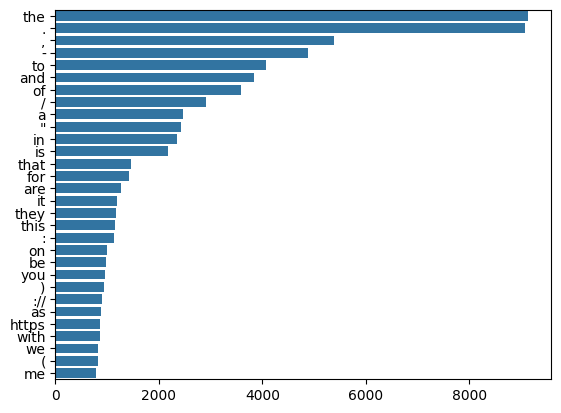

In [65]:
#with stopwords conspiracy
a, b= [], []
for word,count in most_conspiracy[:30]:
    a.append(word)
    b.append(count)

sns.barplot(x=b,y=a)

In [66]:
# with preprocessed text

#total
corpus_total_preproc = []
df_words_preproc = df['preprocessed_text']
corpus_total_preproc = [word for i in df_words_preproc for word in i]

counter_preproc=Counter(corpus_total_preproc)
most_preproc=counter_preproc.most_common()

#critical
corpus_critical_preproc = []
df_words_critical_preproc = df_critical['preprocessed_text']
corpus_critical_preproc = [word for i in df_words_critical_preproc for word in i]

counter_critical_preproc=Counter(corpus_critical_preproc)
most_critical_preproc=counter_critical_preproc.most_common()

#conspiracy
corpus_conspiracy_preproc = []
df_words_conspiracy_preproc = df_conspiracy['preprocessed_text']
corpus_conspiracy_preproc = [word for i in df_words_conspiracy_preproc for word in i]

counter_conspiracy_preproc=Counter(corpus_conspiracy_preproc)
most_conspiracy_preproc=counter_conspiracy_preproc.most_common()

<Axes: >

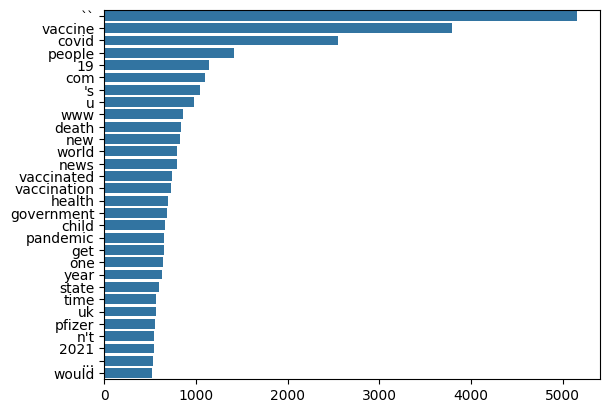

In [67]:
# total preproc
x, y= [], []
for word,count in most_preproc[:30]:
    if (word not in en_stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

<Axes: >

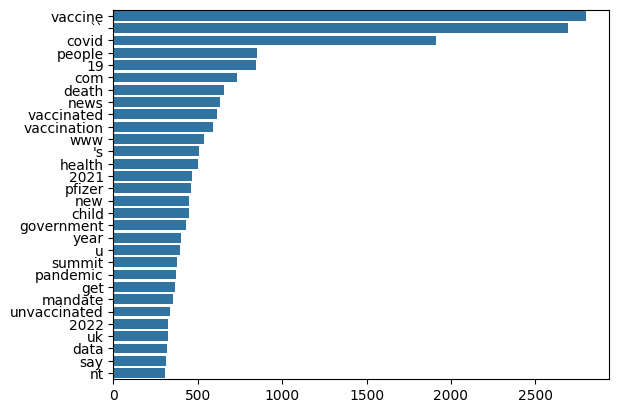

In [68]:
#critical preproc
a, b= [], []
for word,count in most_critical_preproc[:30]:
    if (word not in en_stopwords):
        a.append(word)
        b.append(count)

sns.barplot(x=b,y=a)

<Axes: >

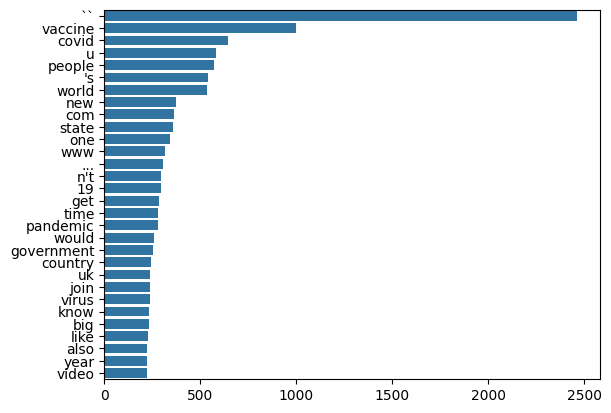

In [69]:
#conspiracy preproc
a, b= [], []
for word,count in most_conspiracy_preproc[:30]:
    if (word not in en_stopwords):
        a.append(word)
        b.append(count)

sns.barplot(x=b,y=a)

In [70]:
# top words are pretty similar, redo this with custom stopwords so it's not all covid
# doesn't seem like there is much imbalance, maybe skewed towards critical a bit even

## N-gram Analysis

In [124]:
# remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [125]:
df_copy = df.copy()
df_copy['text'] = df_copy['text'].apply(remove_urls)
df_copy_critical = df_copy[df_copy['category'] == 'CRITICAL']['text']
df_copy_conspiracy = df_copy[df_copy['category'] == 'CONSPIRACY']['text']

In [126]:
df_copy.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,...,ours,you,your,yours,them,their,theirs,has_emojis,causal_relations,causal_count
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...",...,0,1,2,0,0,0,0,False,[],0
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...",...,0,0,0,0,0,0,0,False,"[{'keyword': 'if', 'cause': 'it', 'effect': 'v...",1
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...",...,0,2,1,0,0,1,0,False,"[{'keyword': 'So', 'cause': 'it', 'effect': '’...",2


In [127]:
def ngrams(corpus, label=None, n=2):

    def preproc_text(text):
        text=re.sub(r'http\S+', '', text) #url removal
        text=re.sub(r'[`/:“”’]', '', text) #special character removal
        text=text.replace('``', '').replace('  ', ' ') #remove backticks and empty strings
        text=text.translate(str.maketrans('', '', string.punctuation)) #punctuation removal
        text=text.lower()
        return text

    def tokenize(text):
        return text.split()

    corpus = [preproc_text(text) for text in corpus]

    vectorizer = CountVectorizer(ngram_range=(n, n), tokenizer=tokenize, stop_words=list(en_stopwords))
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    ngram_freq = Counter()
    for row in X.toarray():
        ngram_freq.update({feature_names[i]: count for i, count in enumerate(row) if count > 0})

    top_ngrams = ngram_freq.most_common(10)
    if label:
        print(f"Top {n}-grams for {label}:")
    else:
        print(f"Top {n}-grams for Entire Corpus:")
    print(top_ngrams)

In [128]:
# bigrams for total
ngrams(df_copy['text'], n=2)

# bi for critical
ngrams(df_copy[df_copy['category'] == 'CRITICAL']['text'], label='CRITICAL', n=2)

# bigrams for conspiracy
ngrams(df_copy[df_copy['category'] == 'CONSPIRACY']['text'], label='CONSPIRACY', n=2)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top 2-grams for Entire Corpus:
[('covid 19', 1017), ('summit news', 375), ('covid vaccine', 287), ('news 2021', 265), ('19 vaccine', 255), ('deep state', 208), ('big pharma', 193), ('agentsoftruth agentsoftruthchat', 190), ('join us', 178), ('5 g', 149)]
Top 2-grams for CRITICAL:
[('covid 19', 783), ('summit news', 368), ('news 2021', 263), ('covid vaccine', 234), ('19 vaccine', 227), ('vaccine passports', 128), ('vaccine mandate', 116), ('covid vaccines', 111), ('dailyveracity com', 110), ('www dailyveracity', 110)]
Top 2-grams for CONSPIRACY:
[('covid 19', 234), ('deep state', 204), ('5 g', 142), ('org uk', 128), ('agentsoftruth agentsoftruthchat', 128), ('saveusnow org', 127), ('big pharma', 125), ('world order', 121), ('new world', 115), ('join us', 113)]


In [129]:
# trigrams for total
ngrams(df_copy['text'], n=3)

# trigrams for critical
ngrams(df_copy[df_copy['category'] == 'CRITICAL']['text'], label='CRITICAL', n=3)

# trigrams for conspiracy
ngrams(df_copy[df_copy['category'] == 'CONSPIRACY']['text'], label='CONSPIRACY', n=3)

Top 3-grams for Entire Corpus:
[('summit news 2021', 264), ('covid 19 vaccine', 254), ('join us agentsoftruth', 147), ('us agentsoftruth agentsoftruthchat', 147), ('saveusnow org uk', 136), ('covid 19 vaccines', 130), ('new world order', 117), ('www dailyveracity com', 113), ('info saveusnow org', 96), ('fully vaxxed covid', 79)]
Top 3-grams for CRITICAL:
[('summit news 2021', 262), ('covid 19 vaccine', 226), ('www dailyveracity com', 110), ('covid 19 vaccines', 106), ('fully vaxxed covid', 79), ('vaxxed covid positive', 79), ('ncbi nlm nih', 59), ('nlm nih gov', 59), ('summit news 2022', 57), ('– fully vaxxed', 56)]
Top 3-grams for CONSPIRACY:
[('saveusnow org uk', 127), ('new world order', 111), ('join us agentsoftruth', 101), ('us agentsoftruth agentsoftruthchat', 101), ('info saveusnow org', 90), ('claim £ 120000', 41), ('www bitchute com', 39), ('bitchute com video', 38), ('biological chemical weapon', 38), ('120000 medical battery', 37)]


In [130]:
# these also seem skewed towards critical

# SEQUENCE LABELING ANALYSIS

In [131]:
df.head()

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,...,ours,you,your,yours,them,their,theirs,has_emojis,causal_relations,causal_count
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...",...,0,1,2,0,0,0,0,False,[],0
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...",...,0,0,0,0,0,0,0,False,"[{'keyword': 'if', 'cause': 'it', 'effect': 'v...",1
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...",...,0,2,1,0,0,1,0,False,"[{'keyword': 'So', 'cause': 'it', 'effect': '’...",2


In [132]:
df['annotations'][0]

[{'span_text': 'Australian Senator Malcolm Roberts',
  'category': 'CAMPAIGNER',
  'annotator': 'gold_label',
  'start_char': 16,
  'end_char': 50,
  'start_spacy_token': 3,
  'end_spacy_token': 7},
 {'span_text': 'the first politician',
  'category': 'CAMPAIGNER',
  'annotator': 'gold_label',
  'start_char': 135,
  'end_char': 155,
  'start_spacy_token': 24,
  'end_spacy_token': 27}]

In [133]:
dataset = dataset_train
dataset

Output hidden; open in https://colab.research.google.com to view.

In [134]:
dataset[0]['annotations'][1]#['category']

{'span_text': 'the first politician',
 'category': 'CAMPAIGNER',
 'annotator': 'gold_label',
 'start_char': 135,
 'end_char': 155,
 'start_spacy_token': 24,
 'end_spacy_token': 27}

In [135]:
# category distribution
categories = [annotation['category'] for data in dataset for annotation in data['annotations']]
cat_count = Counter(categories)

categories = list(cat_count.keys())
counts = list(cat_count.values())

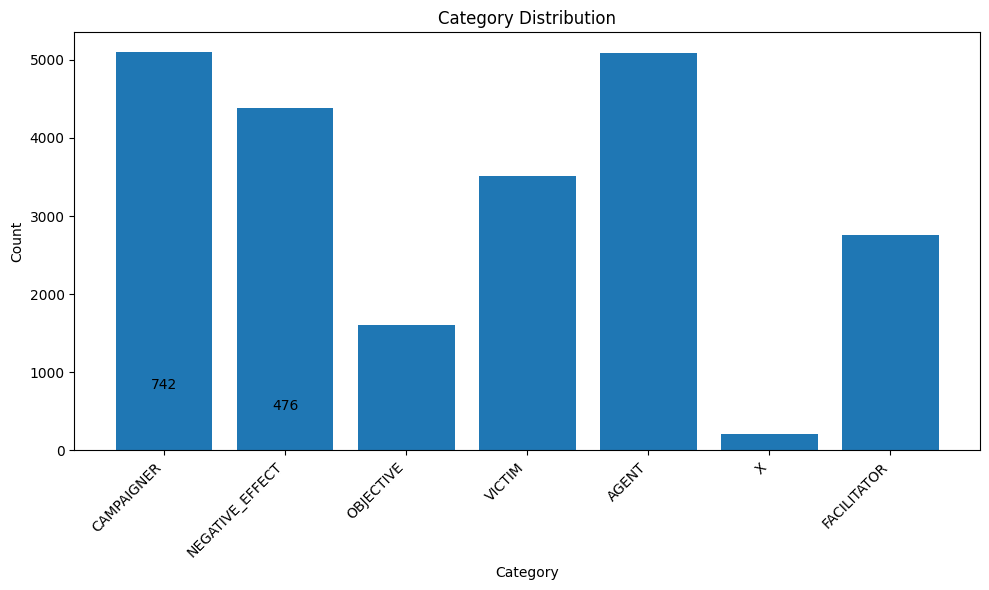

In [136]:
# category distribution
plt.figure(figsize=(10, 6))
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [137]:
# 5 examples of X
# i think these are just tagged for removal
iter_num = 0
for data in dataset:
    annotations = data['annotations']

    if any(annotation['category'] == 'X' for annotation in annotations):
        print(str(iter_num) + ":")
        print(data['text'])
        iter_num += 1
        if iter_num == 5:
            break

0:
EXIT COVID - NEXT - RUSSIA IS BAD NARRATIVE - MSM IS FAKE NEWS - MSM IS - ENNEMY OF THE PEOPLE   SHARE ! ! https :// t . me / QNewsOfficialTV 
1:
Anthony Fauci : ' I ’m Not So Sure ' if Vaccines Should Be Required for Domestic Flights 
2:
' It 's Just Not OK ' - - Harry and Meghan Assail Wealth , Power and Privilege in Vaccine Push 
3:
BQQQQQQQMTHAT 'S MY ANSWER TO MANDATORY VACCINES - CHEMTRAILS AND HOW THEY AFFECT YOU - THOUGHTS ?   SHARE ! ! https :// t . me / QNewsOfficialTV 
4:
Because all the soy , hormones in food , sterilizing vaccines were n't doing enough of the job ... The male birth control pill is underway and is claimed to be 99 % effective . ( Do n't be surprised if your male parts get gangrene and fall off . ) https :// fortune . com / 2022 / 03 / 23 / male - birth - control - pill - human - trials - 2022 / t . me / TruthExtra t . me / TruthExtraChat 


In [138]:
# average category length by character
cat_lengths = {}

for data in dataset:
    annotations = data['annotations']

    for annotation in annotations:
        category = annotation['category']
        span_text = annotation['span_text']
        cat_length = len(span_text)

        if category in cat_lengths:
            cat_lengths[category].append(cat_length)
        else:
            cat_lengths[category] = [cat_length]

print("Average length for each category:")
for category, lengths in cat_lengths.items():
    avg_length = sum(lengths) / len(lengths)
    print(f"{category}: {avg_length:.2f} characters")

Average length for each category:
CAMPAIGNER: 19.25 characters
NEGATIVE_EFFECT: 69.13 characters
OBJECTIVE: 53.71 characters
VICTIM: 20.33 characters
AGENT: 18.70 characters
X: 379.38 characters
FACILITATOR: 22.64 characters


In [139]:
# co-occurence analysis
from collections import defaultdict

co_occurrence_counts = defaultdict(lambda: defaultdict(int))

for data in dataset:
    annotations = data['annotations']

    categories = [annotation['category'] for annotation in annotations]

    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            co_occurrence_counts[categories[i]][categories[j]] += 1
            co_occurrence_counts[categories[j]][categories[i]] += 1

print("Co-occurrence counts between categories:")
for category1, co_occurrences in co_occurrence_counts.items():
    for category2, count in co_occurrences.items():
        print(f"{category1} <-> {category2}: {count} times")

Co-occurrence counts between categories:
CAMPAIGNER <-> CAMPAIGNER: 17378 times
CAMPAIGNER <-> NEGATIVE_EFFECT: 6927 times
CAMPAIGNER <-> OBJECTIVE: 2575 times
CAMPAIGNER <-> VICTIM: 5975 times
CAMPAIGNER <-> AGENT: 8567 times
CAMPAIGNER <-> FACILITATOR: 7578 times
NEGATIVE_EFFECT <-> OBJECTIVE: 1991 times
NEGATIVE_EFFECT <-> VICTIM: 9056 times
NEGATIVE_EFFECT <-> CAMPAIGNER: 6927 times
NEGATIVE_EFFECT <-> AGENT: 12015 times
NEGATIVE_EFFECT <-> NEGATIVE_EFFECT: 15518 times
NEGATIVE_EFFECT <-> FACILITATOR: 4114 times
OBJECTIVE <-> NEGATIVE_EFFECT: 1991 times
OBJECTIVE <-> VICTIM: 2293 times
OBJECTIVE <-> CAMPAIGNER: 2575 times
OBJECTIVE <-> AGENT: 4367 times
OBJECTIVE <-> OBJECTIVE: 2800 times
OBJECTIVE <-> FACILITATOR: 3768 times
VICTIM <-> NEGATIVE_EFFECT: 9056 times
VICTIM <-> OBJECTIVE: 2293 times
VICTIM <-> CAMPAIGNER: 5975 times
VICTIM <-> AGENT: 7731 times
VICTIM <-> VICTIM: 9166 times
VICTIM <-> FACILITATOR: 4799 times
AGENT <-> NEGATIVE_EFFECT: 12015 times
AGENT <-> OBJECTIVE: 

# SEMANTIC + EMOTION ANALYSIS



## Set Up

In [140]:
!pip install pysentimiento

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [141]:
from pysentimiento.preprocessing import preprocess_tweet
from pysentimiento import create_analyzer
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df['preprocessed_pysent'] = df['text'].apply(preprocess_tweet)
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,...,you,your,yours,them,their,theirs,has_emojis,causal_relations,causal_count,preprocessed_pysent
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...",...,0,0,0,0,0,0,False,[],0,THIS IS MASSIVE Australian Senator Malcolm Rob...
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...",...,0,0,0,0,0,0,False,[],0,""" I m deeply concerned that the push to vaccin..."
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...",...,1,2,0,0,0,0,False,[],0,2021 : They wanted to know your vaccination st...
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...",...,0,0,0,0,0,0,False,"[{'keyword': 'if', 'cause': 'it', 'effect': 'v...",1,Anthony Fauci once again defended brutal Chine...
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...",...,2,1,0,0,1,0,False,"[{'keyword': 'So', 'cause': 'it', 'effect': '’...",2,Proof has emerged showing that death from Wuha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7668930807263428, 'Emotion...",...,0,0,0,0,0,0,False,[],0,Police in Australia are warning that unvaccina...
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati...","{'all_punctuation': -0.1645786093196403, 'comm...","{'Extraversion': 0.3648259161850898, 'Emotiona...",...,2,0,0,0,0,0,False,[],0,I personally do nt believe Putin would set off...
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati...","{'all_punctuation': -0.09033541125055704, 'com...","{'Extraversion': -0.8995740621660004, 'Emotion...",...,1,0,0,0,0,0

In [143]:
analyzer_sentiment = create_analyzer(task="sentiment", lang="en")
analyzer_emotion = create_analyzer(task="emotion", lang="en")
analyzer_irony = create_analyzer(task="irony", lang="en")
analyzer_hate = create_analyzer(task="hate_speech", lang="en")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/980 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

## Analysis

In [144]:
def analyze_text(text):
    result = {}

    # sentiment analysis (POS, NEG, NEU)
    sentiment_result = analyzer_sentiment.predict(text)
    result.update({f'sentiment_{label}': prob for label, prob in sentiment_result.probas.items()})

    # emotion analysis (joy, anger, sadness, etc.)
    # using goemotions for english, full list of emotions can be found here: https://arxiv.org/pdf/2005.00547v2
    emotion_result = analyzer_emotion.predict(text)
    result.update({f'emotion_{label}': prob for label, prob in emotion_result.probas.items()})

    # irony analysis (ironic, not ironic)
    irony_result = analyzer_irony.predict(text)
    result.update({f'irony_{label}': prob for label, prob in irony_result.probas.items()})

    # hate speech analysis (hateful, targeted, aggressive)
    hate_speech_result = analyzer_hate.predict(text)
    result.update({f'hate_speech_{label}': prob for label, prob in hate_speech_result.probas.items()})

    return result

In [145]:
df_analysis = df['preprocessed_pysent'].apply(analyze_text)
df_analysis

,preprocessed_pysent
0,"{'sentiment_NEG': 0.26291394233703613, 'sentim..."
1,"{'sentiment_NEG': 0.8031181693077087, 'sentime..."
2,"{'sentiment_NEG': 0.535834550857544, 'sentimen..."
3,"{'sentiment_NEG': 0.2350701093673706, 'sentime..."
4,"{'sentiment_NEG': 0.3918099105358124, 'sentime..."
...,...
3995,"{'sentiment_NEG': 0.9452850818634033, 'sentime..."
3996,"{'sentiment_NEG': 0.49187445640563965, 'sentim..."
3997,"{'sentiment_NEG': 0.8569669723510742, 'sentime..."
3998,"{'sentiment_NEG': 0.34335049986839294, 'sentim..."


In [146]:
df_analysis = df_analysis.apply(lambda x: x if isinstance(x, dict) and x else {})
df_analysis = pd.json_normalize(df_analysis)
df_analysis

,sentiment_NEG,sentiment_NEU,sentiment_POS,emotion_others,emotion_joy,emotion_sadness,emotion_anger,emotion_surprise,emotion_disgust,emotion_fear,irony_not ironic,irony_ironic,hate_speech_hateful,hate_speech_targeted,hate_speech_aggressive
0,0.262914,0.594210,0.142876,0.929097,0.006083,0.000762,0.003911,0.023131,0.033838,0.003179,0.619866,0.380134,0.018447,0.007680,0.013747
1,0.803118,0.192756,0.004126,0.003833,0.001447,0.001653,0.001442,0.001885,0.001829,0.987911,0.944839,0.055161,0.032218,0.005575,0.017024
2,0.535835,0.458876,0.005290,0.975417,0.009296,0.002161,0.001116,0.002943,0.002954,0.006113,0.047560,0.952440,0.016140,0.009089,0.010981
3,0.235070,0.694516,0.070414,0.978409,0.008010,0.001542,0.001016,0.001688,0.006419,0.002917,0.160130,0.839870,0.035790,0.005258,0.022008
4,0.391810,0.593990,0.014200,0.955522,0.009330,0.002995,0.000988,0.002724,0.005177,0.023264,0.932587,0.067413,0.015116,0.009109,0.012117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.945285,0.052181,0.002534,0.200491,0.011830,0.007046,0.003833,0.002713,0.005862,0.768225,0.042317,0.957683,0.129166,0.005721,0.044579
3996,0.491874,0.489765,0.018361,0.031978,0.001284,0.002599,0.006503,0.001163,0.953637,0.002837,0.887041,0.112959,0.158548,0.009650,0.074275
3997,0.856967,0.139194,0.003839,0.118087,0.001943,0.002011,0.011035,0.002471,0.861352,0.003102,0.933998,0.066002,0.013878,0.010554,0.011436
3998,0.343350,0.642131,0.014519,0.960159,0.007519,0.000833,0.001127,0.020820,0.005303,0.004239,0.907426,0.092574,0.014474,0.009705,0.011706


In [147]:
df = pd.concat([df.reset_index(drop=True), df_analysis.reset_index(drop=True)], axis=1)
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,...,emotion_sadness,emotion_anger,emotion_surprise,emotion_disgust,emotion_fear,irony_not ironic,irony_ironic,hate_speech_hateful,hate_speech_targeted,hate_speech_aggressive
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...",...,0.000762,0.003911,0.023131,0.033838,0.003179,0.619866,0.380134,0.018447,0.007680,0.013747
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...",...,0.001653,0.001442,0.001885,0.001829,0.987911,0.944839,0.055161,0.032218,0.005575,0.017024
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...",...,0.002161,0.001116,0.002943,0.002954,0.006113,0.047560,0.952440,0.016140,0.009089,0.010981
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...",...,0.001542,0.001016,0.001688,0.006419,0.002917,0.160130,0.839870,0.035790,0.005258,0.022008
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...",...,0.002995,0.000988,0.002724,0.005177,0.023264,0.932587,0.067413,0.015116,0.009109,0.012117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7668930807263428, 'Emotion...",...,0.007046,0.003833,0.002713,0.005862,0.768225,0.042317,0.957683,0.129166,0.005721,0.044579
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati...","{'all_punctuation': -0.1645786093196403, 'comm...","{'Extraversion': 0.3648259161850898, 'Emotiona...",...,0.002599,0.006503,0.001163,0.953637,0.002837,0.887041,0.112959,0.158548,0.009650,0.074275
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati...","{'all_punctuation': -0.0

In [148]:
# features (emotions, sentiments, hate speech labels) for correlation analysis
features = df_analysis.columns

In [149]:
df['category_numeric'] = df['category'].map({'CONSPIRACY': 0, 'CRITICAL': 1})

In [150]:
for feature in features:
    if df[feature].dtype != 'float64':
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

    valid_data = df[[feature, 'category_numeric']].dropna()

    if valid_data.empty:
        print(f'Insufficient data for correlation analysis for {feature}')
    else:
        try:
            correlation_coefficient, p_value = pearsonr(valid_data[feature], valid_data['category_numeric'])
            print(f'Correlation coefficient between {feature} and category: {correlation_coefficient}')
            print(f'p-value: {p_value}')
        except ValueError as e:
            print(f'Error calculating correlation for {feature}: {e}')

Correlation coefficient between sentiment_NEG and category: -0.07022850952917174
p-value: 8.758885740773185e-06
Correlation coefficient between sentiment_NEU and category: 0.0905281323147076
p-value: 9.722975598422083e-09
Correlation coefficient between sentiment_POS and category: -0.024561019390962013
p-value: 0.12039350550078337
Correlation coefficient between emotion_others and category: 0.2785628788239001
p-value: 3.39639974622005e-72
Correlation coefficient between emotion_joy and category: 0.03144971297743522
p-value: 0.0467095059065874
Correlation coefficient between emotion_sadness and category: 0.08029154176726774
p-value: 3.6819514789962755e-07
Correlation coefficient between emotion_anger and category: -0.21668230743221684
p-value: 1.033079271557766e-43
Correlation coefficient between emotion_surprise and category: 0.033835107395877854
p-value: 0.03236576583011989
Correlation coefficient between emotion_disgust and category: -0.24337618693644253
p-value: 5.0655374733772365e-

In [151]:
correlation_results = []

In [152]:
# correlation analysis between labels and features
for feature in features:
    if df[feature].dtype != 'float64':
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

    valid_data = df[[feature, 'category_numeric']].dropna()

    if valid_data.empty:
        print(f'Insufficient data for correlation analysis for {feature}')
    else:
        try:
            correlation_coefficient, p_value = pearsonr(valid_data[feature], valid_data['category_numeric'])
            correlation_results.append({'feature': feature, 'correlation': correlation_coefficient, 'p_value': p_value})
        except ValueError as e:
            print(f'Error calculating correlation for {feature}: {e}')

In [153]:
correlation_df = pd.DataFrame(correlation_results)

<ipython-input-154-0f063c4594d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=correlation_df, x='feature', y='correlation', palette='viridis')


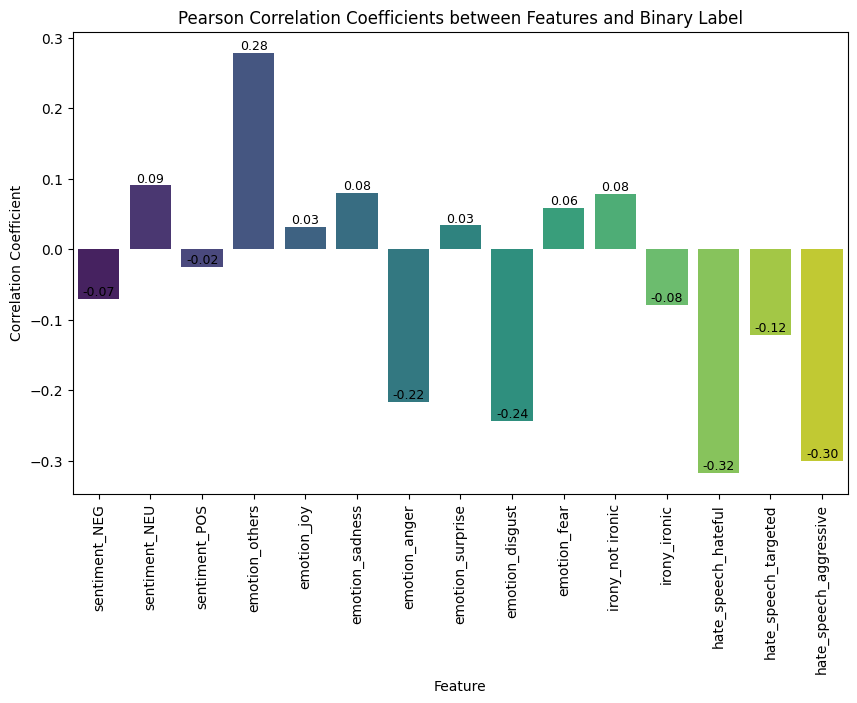

In [154]:
# high pos correlation -> feature associated with critical
# high neg correlation -> feature associated with conspiracy
# low correlation -> weak association
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=correlation_df, x='feature', y='correlation', palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                color='black',  # Choose a color that contrasts well with the bar color
                fontsize=9)    # Adjust fontsize as needed

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Pearson Correlation Coefficients between Features and Binary Label')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.show()

# BIG 5 ANALYSIS

In [108]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.5 MB/s eta 0:00:00


In [109]:
import emoji

In [112]:
def contains_emojis(text):
    return any(char in emoji.EMOJI_DATA for char in text)

In [114]:
df["has_emojis"] = df["text"].apply(contains_emojis)
df["has_emojis"].value_counts()
# no emojis - removed from analysis

,count
has_emojis,
False,4000


In [115]:
!pip install better-profanity

In [77]:
from better_profanity import profanity

In [78]:
profanity.load_censor_words()

def count_vulgar_words(text):
    tokens = word_tokenize(text.lower())
    return sum(1 for token in tokens if profanity.contains_profanity(token))

In [79]:
url_pattern = re.compile(r"https?://\S+|www\.\S+")

def count_links(text):
    return len(re.findall(url_pattern, text))

In [80]:
# feature extraction (based on bessi)
def extract_features(text):
    tokens = word_tokenize(text.lower())
    features = {
        "all_punctuation": sum(1 for t in tokens if t in ".,;!?()"),
        "commas": tokens.count(","),
        "exclamation_marks": tokens.count("!"),
        "question_marks": tokens.count("?"),
        "parentheses": tokens.count("(") + tokens.count(")"),
        "words_longer_6": sum(1 for t in tokens if len(t) > 6),
        "first_person_singular": sum(1 for t in tokens if t in {"i", "me", "my", "mine"}),
        "first_person_plural": sum(1 for t in tokens if t in {"we", "us", "our", "ours"}),
        "second_person": sum(1 for t in tokens if t in {"you", "your", "yours"}),
        "negative_particles": sum(1 for t in tokens if t in {"not", "no", "never"}),
        #"positive_emoticons": emoji_counts["positive_emojis"],
        #"negative_emoticons": emoji_counts["negative_emojis"],
        "numbers": sum(1 for t in tokens if t.isdigit()),
        "prepositions": sum(1 for t in tokens if t in {"in", "on", "at", "since", "for", "ago", "until", "by"}),
        "vulgar_words": count_vulgar_words(text),
        "total_word_count": len(tokens),
        "external_links": count_links(text),
    }
    return features

In [82]:
df["features"] = df["text"].apply(extract_features)
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati..."
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati..."
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati..."
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati..."
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat..."
...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati..."
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati..."
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati..."
3998,11338,""" It is utterly bizarre and inexplicable - Dr....",CRITICAL,"[{'span_text': 'Dr. John Campbell', 'category'...",WyJcIiIsICJJdCIsICJpcyIsICJ1dHRlcmx5IiwgImJpem...,"[``, utterly, bizarre, inexplicable, dr., john...",1,"{'all_punctuation': 6, 'commas': 1, 'exclamati..."


In [83]:
# normalized
features_df = pd.DataFrame(df["features"].tolist())
feature_means = features_df.mean()
feature_stds = features_df.std()

def normalize_features(features):
    normalized = {key: (value - feature_means[key]) / feature_stds[key] for key, value in features.items()}
    return normalized

df["normalized_features"] = df["features"].apply(normalize_features)

In [88]:
def score_personality(features):
    personality = {
        "Extraversion": (
            features["first_person_singular"] +
            features["first_person_plural"] +
            features["exclamation_marks"] +
            features["total_word_count"]
        ),
        "Emotional_Stability": (
            features["words_longer_6"] -
            features["negative_particles"] -
            features["vulgar_words"] -
            features["question_marks"]
        ),
        "Agreeableness": (
            features["first_person_plural"] -
            features["negative_particles"] -
            features["vulgar_words"]
        ),
        "Conscientiousness": (
            features["words_longer_6"] +
            features["prepositions"] +
            features["total_word_count"] -
            features["vulgar_words"] -
            features["external_links"]
        ),
        "Openness": (
            features["words_longer_6"] +
            features["prepositions"] +
            features["numbers"] -
            features["parentheses"] -
            features["commas"]
        ),
    }
    return personality

In [89]:
df["personality_scores"] = df["normalized_features"].apply(score_personality)
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion..."
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion..."
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion..."
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion..."
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio..."
...,...,...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7668930807263428, 'Emotion..."
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati...","{'all_punctuation': -0.1645786093196403, 'comm...","{'Extraversion': 0.3648259161850898, 'Emotiona..."
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati...","{'all_punctuation': -0.09033541125055704, 'com...","{'Extraversion': -0.8995740621660004, 'Emotion..."
3998,11338,""" It is utterly bizarre and inexplicable - Dr....",CRITICAL,"[{'span_text': 'Dr. John Campbell', 'category'...",WyJcIiIsICJJdCIsICJpcyIsICJ1dHRlcmx5IiwgImJpem...,"[``, utterly, bizarre, inexplicable, dr., john...",1,"{'all_punctuation': 6, 'commas': 1, 'exclamati...","{'all_punctuation': -0.2388218073887236, 'comm...","{'Extraversion': -1.53423739447307, 'Emotional..."


In [90]:
def label_personality(scores):
    labels = {trait: "y" if score > 0 else "n" if score < 0 else "o" for trait, score in scores.items()}
    return labels

df["personality_labels"] = df["personality_scores"].apply(label_personality)
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,personality_labels
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '..."
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '..."
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '..."
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '..."
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...","{'Extraversion': 'n', 'Emotional_Stability': '..."
...,...,...,...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7668930807263428, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '..."
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati...","{'all_punctuation': -0.1645786093196403, 'comm...","{'Extraversion': 0.3648259161850898, 'Emotiona...","{'Extraversion': 'y', 'Emotional_Stability': '..."
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati...","{'all_punctuation': -0.09033541125055704, 'com...","{'Extraversion': -0.8995740621660004, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '..."
3998,11338,""" It is utterly bizarre and inexplicable - Dr....",CRITICAL,"[{'span_text': 'Dr. John Campbell', 'category'...",WyJcIiIsICJJdCIsICJpcyIsICJ1dHRlcmx5IiwgImJpem...,"[``, utterly, bizarre, inexplicable, dr., john...",1,"{'all_punctuation': 6, 'commas': 1, 'exclamati...","{'all_punctuation': -0.2388218073887236, 'comm...","{'Extraversion': -1.5342

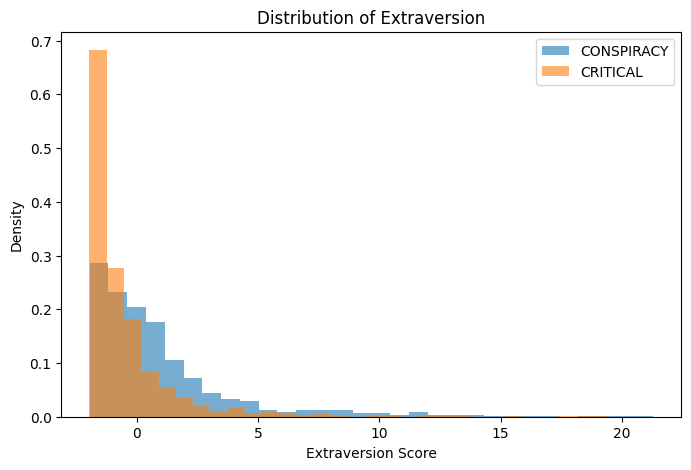

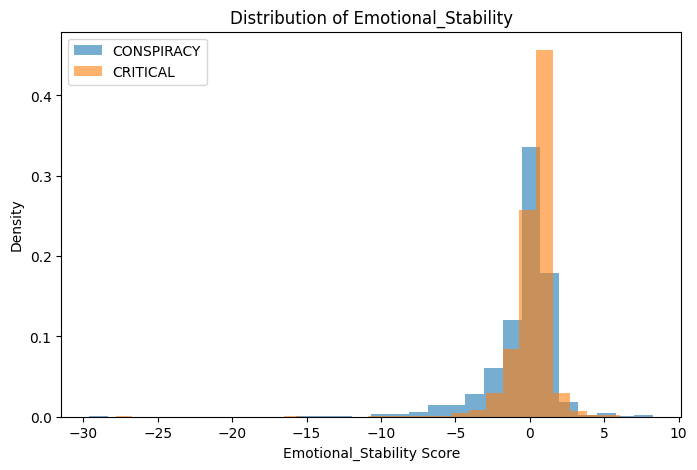

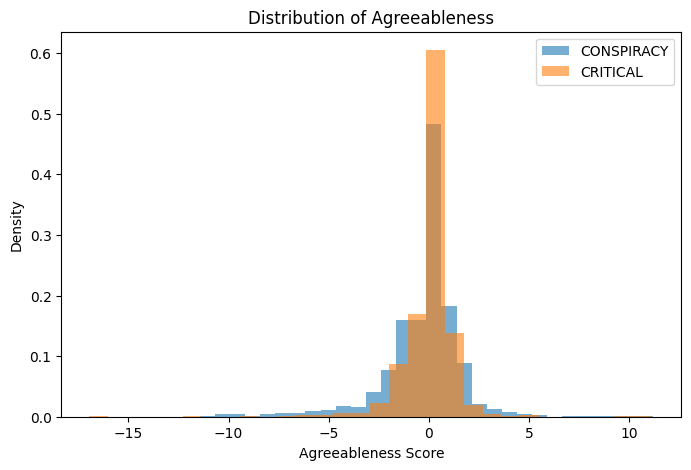

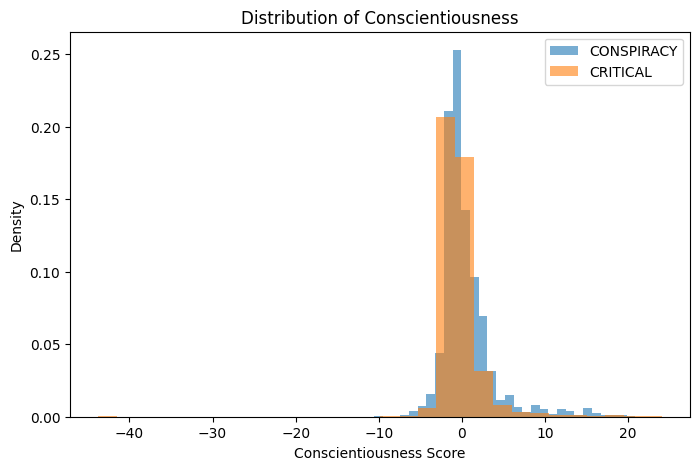

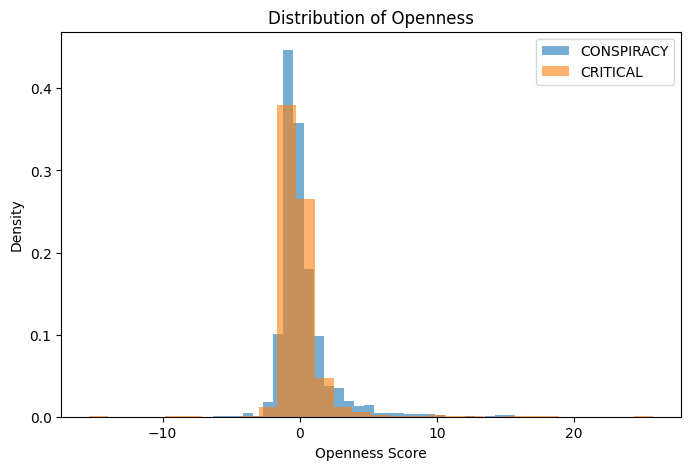

In [91]:
traits = ["Extraversion", "Emotional_Stability", "Agreeableness", "Conscientiousness", "Openness"]

for trait in traits:
    plt.figure(figsize=(8, 5))
    for category in df["category"].unique():
        subset = df[df["category"] == category]
        plt.hist([score[trait] for score in subset["personality_scores"]],
                 bins=30, alpha=0.6, label=category, density=True)
    plt.title(f"Distribution of {trait}")
    plt.xlabel(f"{trait} Score")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# PRONOUN ANALYSIS

In [92]:
from scipy.stats import ttest_ind

In [93]:
pronouns_to_check = ["i", "me", "my", "mine",
                     "we", "us", "our", "ours",
                     "you", "your", "yours",
                     "them", "their", "theirs"]

In [94]:
def count_pronouns(text):
    tokens = word_tokenize(text.lower())
    pronoun_counts = {pronoun: tokens.count(pronoun) for pronoun in pronouns_to_check}
    return pronoun_counts

In [97]:
df["pronoun_counts"] = df["text"].apply(count_pronouns)
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,personality_labels,pronoun_counts
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '...","{'i': 0, 'me': 1, 'my': 0, 'mine': 0, 'we': 0,..."
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '...","{'i': 1, 'me': 0, 'my': 0, 'mine': 0, 'we': 0,..."
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '...","{'i': 0, 'me': 0, 'my': 0, 'mine': 0, 'we': 0,..."
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '...","{'i': 0, 'me': 0, 'my': 0, 'mine': 0, 'we': 0,..."
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...","{'Extraversion': 'n', 'Emotional_Stability': '...","{'i': 1, 'me': 0, 'my': 0, 'mine': 0, 'we': 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7668930807263428, 'Emotion...","{'Extraversion': 'n', 'Emotional_Stability': '...","{'i': 0, 'me': 0, 'my': 0, 'mine': 0, 'we': 0,..."
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati...","{'all_punctuation': -0.1645786093196403, 'comm...","{'Extraversion': 0.3648259161850898, 'Emotiona...","{'Extraversion': 'y', 'Emotional_Stability': '...","{'i': 3, 'me': 0, 'my': 0, 'mine': 0, 'we': 0,..."
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati...","{'all_punctuation': -0.09033541125055704, 'com...","{'Extraversion': -0.8995740621660004, 'Emotion...","{'Extraversion': 'n', 'Emo

In [98]:
pronoun_df = pd.DataFrame(df["pronoun_counts"].tolist())
df = pd.concat([df, pronoun_df], axis=1)

In [99]:
grouped = df.groupby("category")[pronouns_to_check].mean()
print(grouped)

                   i        me        my      mine        we        us  \
category                                                                 
CONSPIRACY  0.500363  0.563452  0.158811  0.002901  0.597534  0.414068   
CRITICAL    0.245326  0.145746  0.071347  0.000763  0.271271  0.145746   

                 our      ours       you      your     yours      them  \
category                                                                 
CONSPIRACY  0.276287  0.000725  0.691806  0.225526  0.002175  0.226976   
CRITICAL    0.106448  0.000000  0.309042  0.136589  0.003052  0.094620   

               their    theirs  
category                        
CONSPIRACY  0.429297  0.001450  
CRITICAL    0.206791  0.000382  


In [100]:
results = {}
for pronoun in pronouns_to_check:
    conspiracy = df[df["category"] == "CONSPIRACY"][pronoun]
    critical = df[df["category"] == "CRITICAL"][pronoun]
    t_stat, p_value = ttest_ind(conspiracy, critical, equal_var=False)  # Welch's t-test
    results[pronoun] = {"t_stat": t_stat, "p_value": p_value}

In [101]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="p_value")  # Sort by p-value
print(results_df)

           t_stat       p_value
me      12.103311  2.502776e-32
you      8.845891  2.045418e-18
their    8.564213  2.045048e-17
us       8.297374  2.142534e-16
we       7.661151  2.914120e-14
them     7.305773  3.976105e-13
our      6.598870  5.350670e-11
i        5.661671  1.716618e-08
your     3.974031  7.300433e-05
my       3.446824  5.813251e-04
mine     1.382720  1.669252e-01
ours     1.000000  3.174861e-01
theirs   0.977084  3.286611e-01
yours   -0.529999  5.961489e-01


<Figure size 1200x800 with 0 Axes>

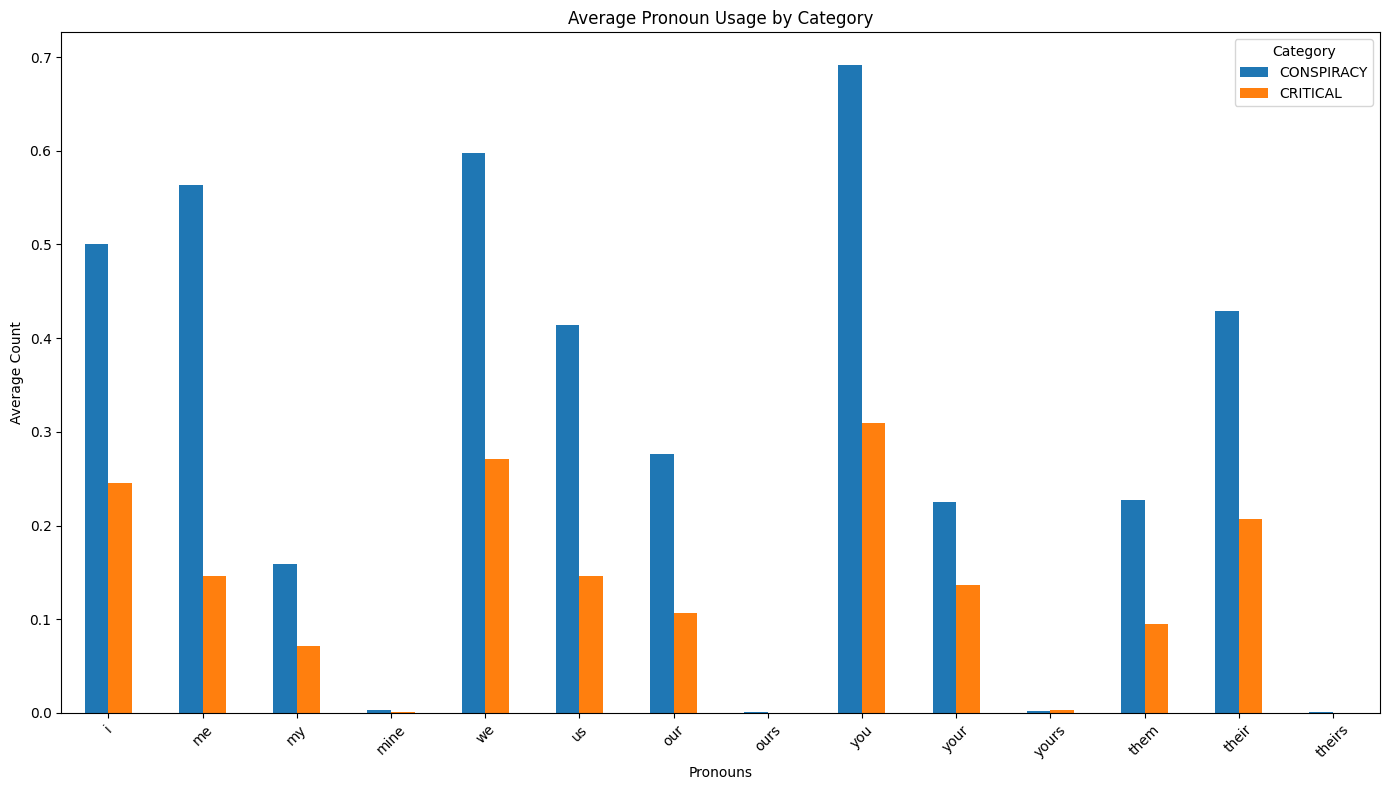

In [102]:
plt.figure(figsize=(12, 8))
grouped.T.plot(kind="bar", figsize=(14, 8))
plt.title("Average Pronoun Usage by Category")
plt.ylabel("Average Count")
plt.xlabel("Pronouns")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [104]:
significant_pronouns = results_df[results_df["p_value"] < 0.05]
print("\nSignificant Pronouns (p-value < 0.05):\n", significant_pronouns)


Significant Pronouns (p-value < 0.05):
           t_stat       p_value
me     12.103311  2.502776e-32
you     8.845891  2.045418e-18
their   8.564213  2.045048e-17
us      8.297374  2.142534e-16
we      7.661151  2.914120e-14
them    7.305773  3.976105e-13
our     6.598870  5.350670e-11
i       5.661671  1.716618e-08
your    3.974031  7.300433e-05
my      3.446824  5.813251e-04


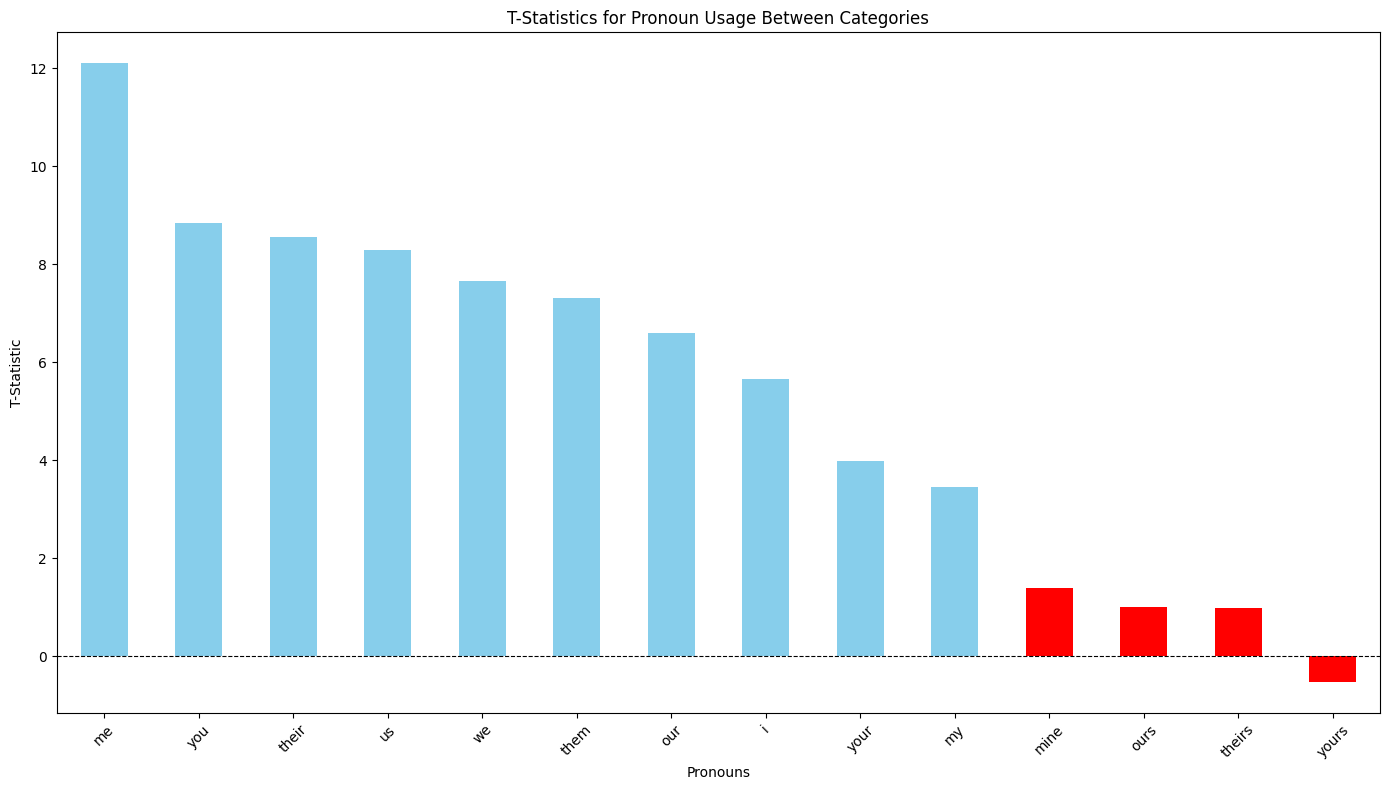

In [107]:
colors = results_df["p_value"].apply(lambda p: "red" if p >= 0.05 else "skyblue")

# Plot t-statistics for pronouns with conditional coloring
plt.figure(figsize=(12, 8))
results_df["t_stat"].plot(kind="bar", color=colors, figsize=(14, 8))
plt.title("T-Statistics for Pronoun Usage Between Categories")
plt.ylabel("T-Statistic")
plt.xlabel("Pronouns")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Reference line at t=0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

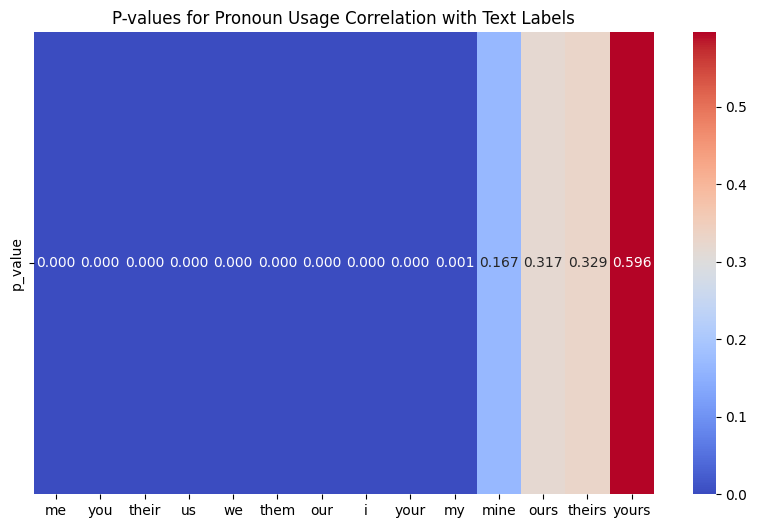

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df[["p_value"]].T, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("P-values for Pronoun Usage Correlation with Text Labels")
plt.show()

# CAUSAL RELATIONS ANALYSIS

In [116]:
# causalbank keywords
causal_keywords = ['as', 'as a consequence', 'as a result of', 'as long as',
                   'because', 'because of', 'caused by', 'due to', 'owing to', 'in response to',
                   'on account of', 'result from',
                   'accordingly', 'consequently', 'bring on', 'bring about', 'give rise to',
                   'induce', 'in order to', 'lead to', 'result in',
                   'and for this reason', 'cause', 'for the purpose of', 'if',
                   'so', 'so that', 'thereby', 'therefore', 'thus', 'hence']

In [117]:
def extract_causal_relations(text):
    doc = nlp(text)
    causal_relations = []

    for token in doc:
        # Check if the token matches a causal keyword
        if token.text.lower() in causal_keywords:
            # Extract cause and effect based on dependency tree
            cause = [child.text for child in token.head.children if child.dep_ in {"nsubj", "nsubjpass"}]
            effect = [child.text for child in token.head.children if child.dep_ in {"dobj", "attr", "ccomp"}]

            # Append results if both cause and effect exist
            if cause and effect:
                causal_relations.append({"keyword": token.text, "cause": " ".join(cause), "effect": " ".join(effect)})

    return causal_relations

In [119]:
df["causal_relations"] = df["text"].apply(extract_causal_relations)
df["causal_count"] = df["causal_relations"].apply(len)

In [120]:
df

,id,text,category,annotations,spacy_tokens,preprocessed_text,category_numeric,features,normalized_features,personality_scores,...,ours,you,your,yours,them,their,theirs,has_emojis,causal_relations,causal_count
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,[{'span_text': 'Australian Senator Malcolm Rob...,WyJUSElTIiwgIklTIiwgIk1BU1NJVkUiLCAiQXVzdHJhbG...,"[massive, australian, senator, malcolm, robert...",0,"{'all_punctuation': 3, 'commas': 0, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -0.1308253891905803, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,[{'span_text': 'I ’m deeply concerned that the...,WyJcdTIwMWMiLCAiSSIsICJcdTIwMTltIiwgImRlZXBseS...,"[deeply, concerned, push, vaccinate, child, no...",1,"{'all_punctuation': 4, 'commas': 0, 'exclamati...","{'all_punctuation': -0.38730820352689016, 'com...","{'Extraversion': -1.0735538362931447, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,"[{'span_text': 'someone who died suddenly', 'c...",WyIyMDIxIiwgIjoiLCAiVGhleSIsICJ3YW50ZWQiLCAidG...,"[2021, wanted, know, vaccination, status, see,...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7324255716517838, 'Emotion...",...,0,1,2,0,0,0,0,False,[],0
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,"[{'span_text': 'brutal Chinese lockdowns', 'ca...",WyJBbnRob255IiwgIkZhdWNpIiwgIm9uY2UiLCAiYWdhaW...,"[anthony, fauci, defended, brutal, chinese, lo...",1,"{'all_punctuation': 3, 'commas': 1, 'exclamati...","{'all_punctuation': -0.46155140159597347, 'com...","{'Extraversion': -1.5256205172044304, 'Emotion...",...,0,0,0,0,0,0,0,False,"[{'keyword': 'if', 'cause': 'it', 'effect': 'v...",1
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,[{'span_text': 'death from Wuhan coronavirus (...,WyJQcm9vZiIsICJoYXMiLCAiZW1lcmdlZCIsICJzaG93aW...,"[proof, emerged, showing, death, wuhan, corona...",1,"{'all_punctuation': 14, 'commas': 5, 'exclamat...","{'all_punctuation': 0.35512377716394267, 'comm...","{'Extraversion': -0.23771674123509096, 'Emotio...",...,0,2,1,0,0,1,0,False,"[{'keyword': 'So', 'cause': 'it', 'effect': '’...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4829,Police in Australia are warning that unvaccina...,CRITICAL,"[{'span_text': 'Police in Australia', 'categor...",WyJQb2xpY2UiLCAiaW4iLCAiQXVzdHJhbGlhIiwgImFyZS...,"[police, australia, warning, unvaccinated, sin...",1,"{'all_punctuation': 2, 'commas': 0, 'exclamati...","{'all_punctuation': -0.5357945996650567, 'comm...","{'Extraversion': -1.7668930807263428, 'Emotion...",...,0,0,0,0,0,0,0,False,[],0
3996,10899,I personally do n’t believe Putin would set of...,CONSPIRACY,"[{'span_text': 'Deep State', 'category': 'AGEN...",WyJJIiwgInBlcnNvbmFsbHkiLCAiZG8iLCAiblx1MjAxOX...,"[personally, nt, believe, putin, would, set, n...",0,"{'all_punctuation': 7, 'commas': 3, 'exclamati...","{'all_punctuation': -0.1645786093196403, 'comm...","{'Extraversion': 0.3648259161850898, 'Emotiona...",...,0,2,0,0,0,0,0,False,[],0
3997,10637,Pfizer lied . We know that . There 's no doubt...,CRITICAL,"[{'span_text': 'Pfizer', 'category': 'AGENT', ...",WyJQZml6ZXIiLCAibGllZCIsICIuIiwgIldlIiwgImtub3...,"[pfizer, lied, know, 's, doubt, robert, f., ke...",1,"{'all_punctuation': 8, 'commas': 4, 'exclamati...","{'all_punctuation': -0.09033541125055704, 'com...","{'Extraversion': -0.8995740621660004, 'Emotion...",...,0,1,0,0,0,0,0,False,[],0
3998,11338,""" It is utterly bizarre and inexplicable - Dr....",CRITICAL,"[{'span_text': 'Dr. John Campbell', 'category'...",WyJcIiIsICJJdCIsICJpcyIsICJ1dHRlcmx5IiwgImJpem...,"[``, utterly, bizarre, inexplicable, dr., john...",1,"{'all_punctuation': 6, 'commas': 1, 'exclamati...","{'all_punctuation': -0.2388218073887236, 'comm...","{'Extr

In [121]:
grouped_causal_counts = df.groupby("category")["causal_count"].mean()
print("Average Causal Counts by Category:\n", grouped_causal_counts)

Average Causal Counts by Category:
 category
CONSPIRACY    0.380711
CRITICAL      0.205265
Name: causal_count, dtype: float64


In [122]:
conspiracy_causal = df[df["category"] == "CONSPIRACY"]["causal_count"]
critical_causal = df[df["category"] == "CRITICAL"]["causal_count"]
t_stat, p_value = ttest_ind(conspiracy_causal, critical_causal, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 7.398331683978948, P-value: 1.9888143542788402e-13


<ipython-input-123-57d3a7eb050d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_causal_counts.index, y=grouped_causal_counts.values, palette="coolwarm")


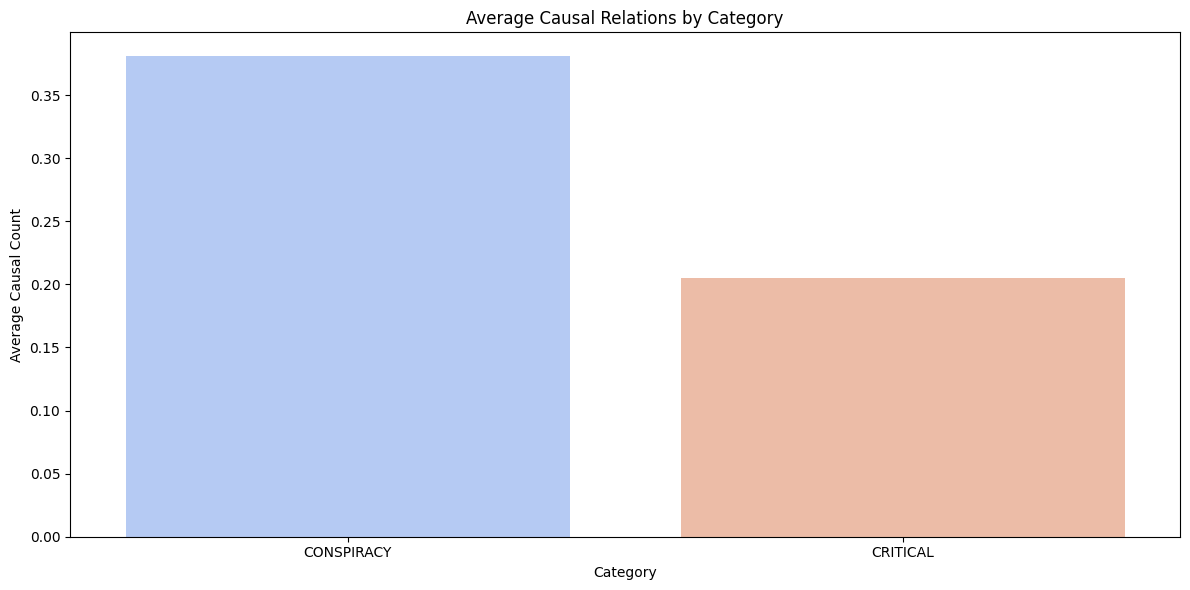

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_causal_counts.index, y=grouped_causal_counts.values, palette="coolwarm")
plt.title("Average Causal Relations by Category")
plt.ylabel("Average Causal Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()